# Thông tin chung


* Thành viên nhóm:
  1. Võ Phạm Tuấn Dũng	
* Nội dung bài báo cáo tập trung vào các vấn đề sau của bộ phân loại Softmax Regression:
  * Nghiên cứu hàm Softmax
  * Nghiên cứu boudary decision đầu ra của bộ phân loại
  * Nghiên cứu cách tính hàm lỗi cross-entropy





# 1. Hàm Softmax 


## 1.1 Công thức tính
Chúng ta sử dụng các kí hiệu giống như trong slide và các giáo trình. Chú ý: $K$ là số lớp đầu ra của mô hình Softmax Regression.

<img height= 50%;
  width= 50% src= "https://www.researchgate.net/publication/362513483/figure/fig1/AS:11431281079091665@1660537640671/Diagram-of-FC-layer-and-softmax-function-in-DNN.png">

Công thức hàm softmax:
$$a(z_i) = \frac{e^{z_i}}{e^{z_1} + e^{z_2}+...+ e^{z_K}}$$

Ta nhận thấy: 
$$ \sum_{i = 1}^{K}a(z_i) 
=\sum_{i = 1}^{K}\frac{e^{z_i}}{e^{z_1} + e^{z_2}+...+ e^{z_K}} 
= \frac{e^{z_1} + e^{z_2}+...+ e^{z_K}}{e^{z_1} + e^{z_2}+...+ e^{z_K}} = 1$$
$$a(z_i) > 0, \; \forall \:\:i = \overline{1,K}$$

 Như vậy, ta có thể coi đầu ra của hàm softmax $a(z_i)$ là xác suất của điểm dữ liệu đầu vào $\mathbf{x}$ phụ thuộc lớp thứ $i$:
 $$\hat{y_i}  = a(z_i) = p(y = i \;|\; \mathbf{x}, \mathbf{W})$$

## 1.2 Trường hợp của Logistic Regression

Logistic Regression là trường hợp suy biến của Softmax Regression khi $K = 2$ . Thật vậy, trong trường hợp này: $$\hat{y_1}  = a(z_1) = \frac{1}{1 + e^{z_2 - z_1}} = sigmoid[(\mathbf{w_2} - \mathbf{w_1})^T\mathbf{x}] = sigmoid(\mathbf{w}_{lr}^T\mathbf{x})$$
$$\hat{y}_2 = 1 - \hat{y}_1$$

Nếu tính được $\hat{y_1}$, ta dễ dàng tính được $\hat{y_2}$. Do đó Logistic Regression chỉ cần một kết quả đầu ra là $\hat{y_1}$, việc tính $z_2$, $\hat{y_2}$ là không cần thiết.

# 2. Boundary Decision của Softmax Regression

## 2.1 Phát biểu bài toán
Xét một bộ phân loại Softmax Regression nhận dữ liệu đầu vào là các điểm trong không gian $n$ chiều. Chứng minh các ***boundary decision*** tạo ra bởi bộ phân loại này là các siêu phẳng tuyến tính thuộc không gian $n-1$ chiều. 

## 2.2 Chứng minh:

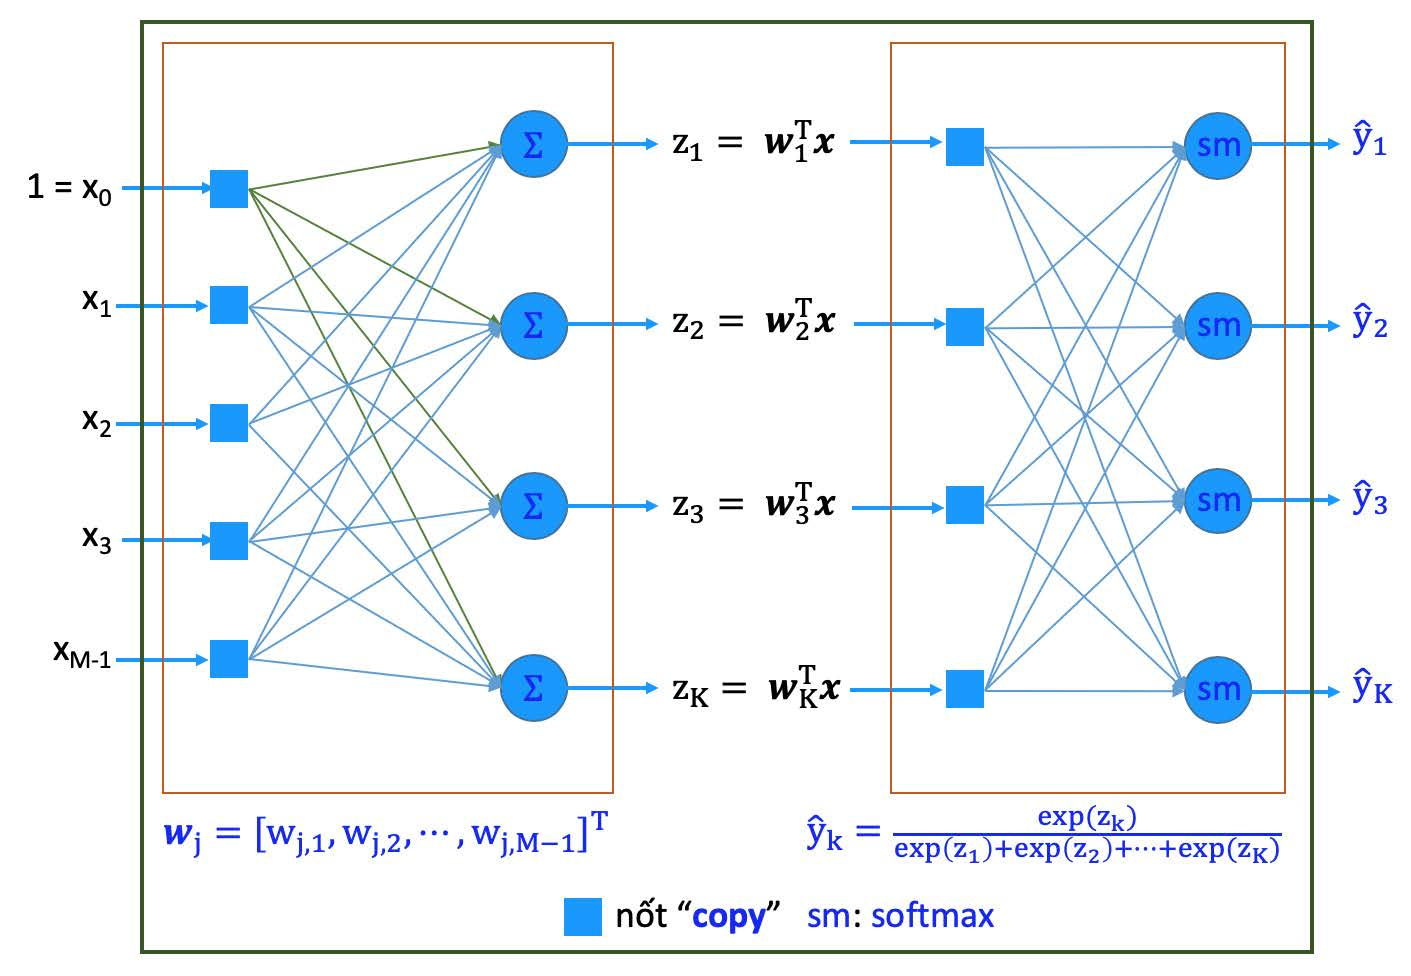

Chúng ta sẽ sử dụng kí hiệu như trong slide. Chú ý, $K$ là số lớp đầu ra của bộ phân loại.
* Trước hết ta nhận thấy, một điểm dữ liệu $ \mathbf{x} = [x_1, x_2,...,x_m] ^T$ được dự đoán là nhãn $i$ khi và chỉ khi thõa mãn hệ bất phương trình: $ \hat{y_i} \ge \hat{y_j},\:\:\:\: \forall j \ne i, \:j = \overline{1,K}$.
* Tiếp theo, ta có những biến đổi tương đương sau:
$$\hat{y_i} \ge \hat{y_j}
\\ \Leftrightarrow \frac{e^{z_i}}{e^{z_1} + e^{z_2}+...+ e^{z_K}} \ge  \frac{e^{z_j}}{e^{z_1} + e^{z_2}+...+ e^{z_K}},
\\ \Leftrightarrow e^{z_i} \ge  e^{z_j},
\\ \Leftrightarrow z_i \ge  z_j
\\ \Leftrightarrow \mathbf{w_i}^{T}\mathbf{x} \ge  \mathbf{w_j}^{T}\mathbf{x}
\\ \Leftrightarrow (\mathbf{w_i} - \mathbf{w_j})^{T}\mathbf{x} \ge 0$$
* Từ hai điều trên, ta suy ra được để điểm dữ liệu $\mathbf{x}$ được gán nhãn là $i$ tương đương với hệ bất phương trình $(\mathbf{w_i} - \mathbf{w_j})^{T}\mathbf{x} \ge 0,\:\:\:\: \forall j \ne i, \:j = \overline{1,K}.$
* Như vậy, ta có thể khẳng định không gian chứa các điểm được mô hình phân loại là nhãn $i$ được giới hạn bởi các siêu phẳng tuyến tính $(\mathbf{w_i} - \mathbf{w_j})^{T}\mathbf{x} = 0$. Các điểm nằm ngoài vùng không gian con này sẽ được phân loại lớp khác $i$. Hay nói cách khác, các ***boundary decision*** giữa các lớp là các siêu phẳng tuyến tính.

## 2.3 Visualize minh họa trong không gian 2 chiều

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

**Tạo dữ liệu mô phỏng**

Ta sử dụng module make_blobs của thư viện scikit-learn, để tạo ra các cluster điểm dữ liệu, mỗi cluster sẽ tương ứng với một lớp phân loại. 

In [13]:
num_samp = 10000
X, y = make_blobs(n_samples = num_samp, centers = 7, n_features = 2)

**Scale và phân chia tập dữ liệu**

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X)
train_percent = 0.8
train_num = int(num_samp * train_percent)
X_train = X[:train_num]
y_train = y[:train_num]
X_test = X[train_num:]
y_test = y[train_num:]

**Tạo mô hình và huấn luyện** 

In [15]:
softmax_classifer = LogisticRegression().fit(X_train, y_train)

**Visualize Boudary Decision trên train set**

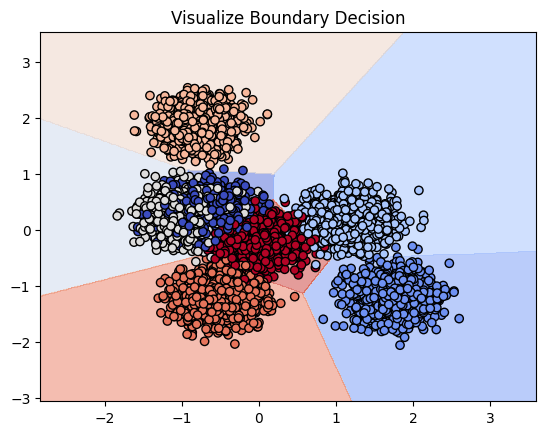

In [16]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(softmax_classifer, X_train, response_method="predict", 
                                              alpha=0.5, cmap=plt.cm.coolwarm, grid_resolution = 500)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.coolwarm)
plt.title("Visualize Boundary Decision")
plt.show()

**Visualize Boudary Decision trên test set**

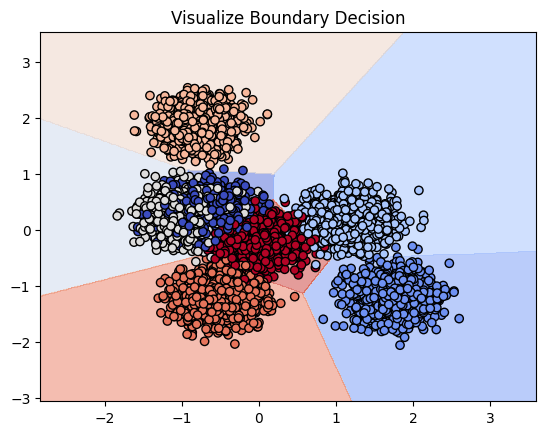

In [17]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(softmax_classifer, X_train, response_method="predict", 
                                              alpha=0.5, cmap=plt.cm.coolwarm, grid_resolution = 500)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.coolwarm)
plt.title("Visualize Boundary Decision")
plt.show()

# 3. Hàm lỗi cross-entropy

## 3.1 Xây dựng công thức tính

Ta nhận thấy, đầu ra của mô hình Softmax Regression là một vectơ phân phối xác suất. Ta có công thức cross-entropy $H$ để đo lường sự sai khác giữa hai vectơ xác suất $q$ so với vectơ xác suất $p$:
$$H_p(q) = -E_p(\log{q}) =  -\sum_{i = 1}^{K}p_i \log q_i $$

Trong công thức xuất hiện dấu trừ là để đảm bảo giá trị của hàm lỗi luôn dương. Như vậy, cross-entropy của vectơ $q$ so với $p$ là giá trị tuyệt đối của giá trị  kì vọng (kí hiệu $E$) của $\log{q}$ theo phân phối xác suất $p$.

Hàm lỗi cho mỗi điểm dữ liệu đầu vào $\mathbf{x}$ của Softmax Regression là cross-entropy là cross-entropy của vectơ xác suất đầu ra $\mathbf{\hat{y}}$ so với vectơ $\mathbf{y}$ biểu diễn ground true label ở dạng one-hot. Về bản chất, ý nghĩa của $\mathbf{y}$ chính là vectơ xác suất đầu ra lí tưởng của $\mathbf{x}$ (nếu $\mathbf{x}$ thuộc lớp $i$ thì các phần tử của $\mathbf{y}$ đều bằng $0$, ngoại trừ phần tử thứ $i$ bằng $1$). 
$$L(\mathbf{x}, \mathbf{W}) = H_\mathbf{y}(\mathbf{\hat{y}}) = -\mathbf{y}\mathbf{\log{\hat{y}^T}} = -\log{\hat{y}}_{label(\mathbf{x})}$$

Ta viết lại công thức trên như sau, $\odot$ là kí hiệu cho phép element-wise product (hay Hadamard Product):
$$L(\mathbf{x}, \mathbf{W}) = -\mathbf{y}\odot\mathbf{\log{\hat{y}}}$$

Như vậy, hàm lỗi entropy của toàn bộ tập dữ liệu đầu vào $\mathbf{X}$ sẽ được tính theo công thức dưới đây. Chú ý: $N$ là số điểm dữ liệu đầu vào, $K$ là số lớp phân loại.  $\mathbf{Y}$ là ma trận ở dạng one-hot cho nhãn của tập dữ liệu,  $\mathbf{\hat{Y}}$ là ma trận xác suất đầu ra của Softmax Regresion, đều có cùng kích thước $N \times K$.
Để dễ dàng lấy tổng các phần tử trong ma trận, ta dùng kí hiệu $\mathbf{u}_n$ là vectơ có độ dài $n$ với các phần tử đều bằng 1.
$$L(\mathbf{X}, \mathbf{W}) =- \frac{1}{N} \sum_{i = 1}^{K}{y_i}\odot{\log{\hat{y_i}}}=-\frac{1}{N}\mathbf{u}_N^T({\mathbf{Y} \odot \log{\mathbf{\hat{Y}}}})\mathbf{u}_K$$

## 3.2 Kiểm tra công thức

**Tính cross-entropy loss cho bộ test set trên bằng công thức đã xây dựng**

In [18]:
from keras.utils import to_categorical

In [19]:
#Tạo ma trận one-hot cho nhãn của tập test set.
Y = to_categorical(y_test)
#Ma trận Y_hat là ma trận kết quả đầu ra của mô hình, kích thước là N x K (N là số sample, K là số class)
Y_hat = softmax_classifer.predict_proba(X_test)
N, K = Y_hat.shape

In [20]:
# Áp dụng công thức tính L ở trên
L = np.matmul(np.ones(N).reshape(1,N), Y * np.log(Y_hat))
L = np.matmul(L, np.ones(K).reshape(K,1))
L *= -1/N
# Đầu ra của L là ma trận 1*1, ta coi như một giá trị vô hướng l.
print(L)

[[0.25646475]]


In [21]:
my_loss = L[0][0]
print(my_loss)

0.25646474779253065


* Ta được kết quả của cross-entropy loss là 0.25646474779253065.

**Kiểm tra lại bằng hàm log_loss của module sklearn.metrics**

In [22]:
import sklearn.metrics
prob_pred = softmax_classifer.predict_proba(X_test)
y_pred = np.argmax(prob_pred, axis = 1)
scikit_learn_ce_loss = sklearn.metrics.log_loss(y_test, prob_pred)
print(scikit_learn_ce_loss)

0.2564647477925308


* Nhận xét: kết quả mà từ công thức ta đã xây dựng hoàn toàn khớp với kết quả của hàm  log_loss.